# Handwritten Letter Classifier

## Step 1: Install ```emnist``` Python package

In [1]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Step 2: Load the Dataset

In [2]:
import idx2numpy
import numpy as np

# Load training data
x_train = idx2numpy.convert_from_file('emnist-letters-train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('emnist-letters-train-labels-idx1-ubyte')

# Load testing data
x_test = idx2numpy.convert_from_file('emnist-letters-test-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('emnist-letters-test-labels-idx1-ubyte')

# Rotate and Flip EMNIST images
x_train = np.rot90(x_train, k=1, axes=(1,2))
x_test = np.rot90(x_test, k=1, axes=(1,2))

x_train = np.flip(x_train, axis=2)
x_test = np.flip(x_test, axis=2)

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Labels 1-26 to 0-25
y_train = y_train - 1
y_test = y_test - 1

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Train data shape: (124800, 28, 28, 1)
Test data shape: (20800, 28, 28, 1)


## Step 3: Test a Sample Image

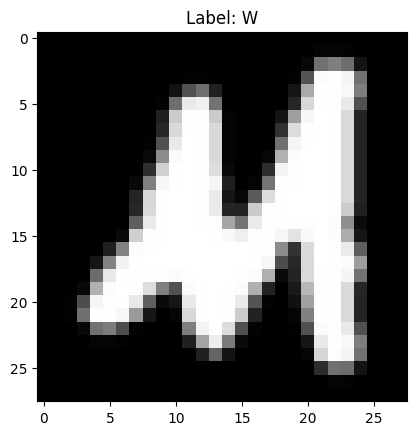

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {chr(y_train[0] + 65)}")
plt.show()

## Step 4: Train a CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train, 
    epochs=15, 
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop]
)

model.save('letter_model.keras')

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.7359 - loss: 0.8660 - val_accuracy: 0.8953 - val_loss: 0.3267
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.8555 - loss: 0.4586 - val_accuracy: 0.9128 - val_loss: 0.2623
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8803 - loss: 0.3785 - val_accuracy: 0.9224 - val_loss: 0.2349
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.8929 - loss: 0.3341 - val_accuracy: 0.9256 - val_loss: 0.2192
Epoch 5/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9018 - loss: 0.3006 - val_accuracy: 0.9312 - val_loss: 0.2057
Epoch 6/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9091 - loss: 0.2777 - val_accuracy: 0.9354 - val_loss: 0.1990
Epoch 7/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.9159 - loss: 0.2608 - val_accuracy: 0.9355 - val_loss: 0.1989
Epoch 8/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.9191 - loss: 0.2441 - 

## Step 5: Plot Accuracy and Validation Loss

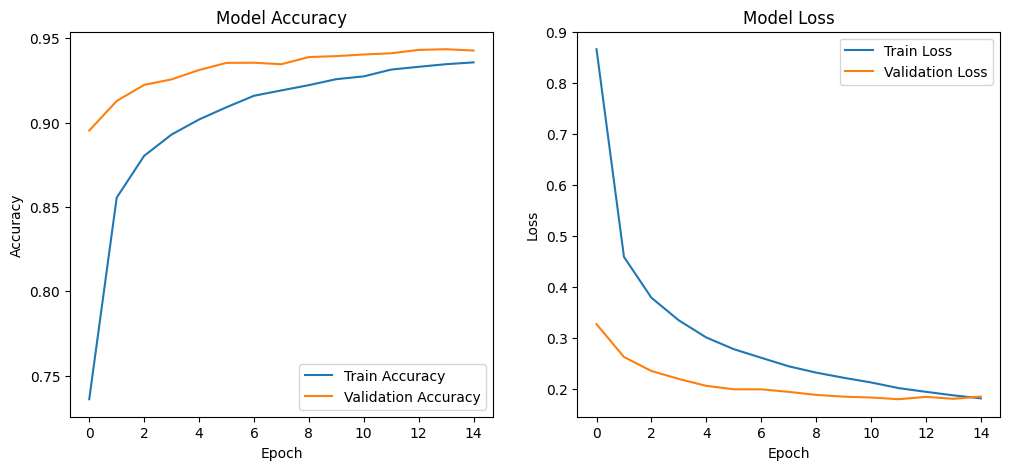

In [7]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Validation loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()